 # Digital Image Processing - Assignment 1
 ### Laksh Nanwani - 2021701002 - MS CSE - laksh.nanwani@research.iiit.ac.in
 --- 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. Harry’s Escape

__How does the green screen help in this task?__
<br>__Ans:__ With the help of green sceen, we can merge any image of harry taken infront of the green screen with any background image. A green coloured screen is used because green is one of the colors that don't happen to occur naturally in human body and hence humans can be easily cropped out of the green screen image.

__1) Generate images for your fake trail to leave for Voldemort and the death eaters
using this method.__

__(a) Test your implementation using the provided foreground(fg.jpg) and backround(bg.jpg).__

In [2]:
def removeGreenScreenAndMerge(bg_img, fg_img, low_green, high_green):
    assert bg_img.shape == fg_img.shape
    mask = cv2.inRange(fg_img, low_green, high_green)
#     plt.imshow(mask, cmap='gray')
    
    masked_bg_img = np.copy(bg_img)
    masked_bg_img[mask == 0] = [0, 0, 0]
#     plt.imshow(masked_bg_img)
    
    cropped_fg_img = np.copy(fg_img)
    cropped_fg_img[mask != 0] = [0, 0, 0]
    
    return (masked_bg_img + cropped_fg_img)

As we can see, the function takes 2 input green colors (RGB array), the low and the high green, these are used to define ranges of green that has to be cropped out of the foreground image, ie, the green outside of this range is not coinciding with the useful image. We create a mask of harry using this greens and then using this mask we crop out the area from backgroung image and also crop out harry from the green screen image. Now we simply merge these two images and we have the final image.

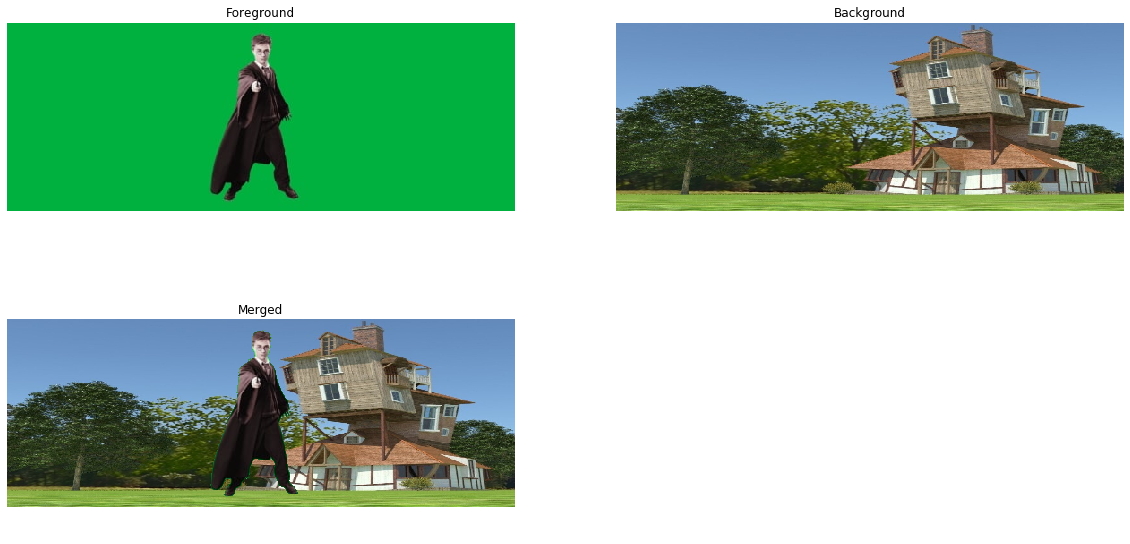

In [3]:
fg_image = cv2.imread("../images/fg.jpg")
bg_image1 = cv2.imread("../images/bg.jpg")

fg_image = cv2.cvtColor(fg_image, cv2.COLOR_BGR2RGB)
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)

bg_image1 = cv2.resize(bg_image1, (fg_image.shape[1], fg_image.shape[0]))

merged_img1 = removeGreenScreenAndMerge(bg_image1, fg_image, np.array([0, 110, 0]), np.array([110, 255, 90]))

fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize = (20,10))
axes1[0][0].imshow(fg_image)
axes1[0][0].axis('off')
axes1[0][0].set_title("Foreground")

axes1[0][1].imshow(bg_image1)
axes1[0][1].axis('off')
axes1[0][1].set_title("Background")

axes1[1][0].imshow(merged_img1)
axes1[1][0].axis('off')
axes1[1][0].set_title("Merged")

axes1[1][1].axis('off')

plt.show()

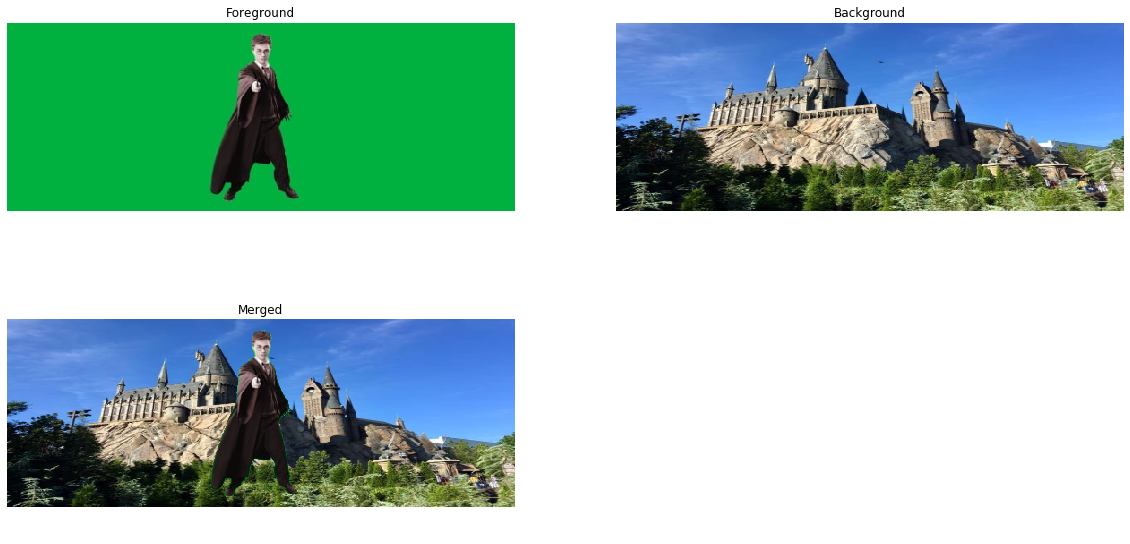

In [4]:
bg_image2 = cv2.imread("../images/hogwarts.jpg")
bg_image2 = cv2.cvtColor(bg_image2, cv2.COLOR_BGR2RGB)
bg_image2 = cv2.resize(bg_image2, (fg_image.shape[1], fg_image.shape[0]))

merged_img2 = removeGreenScreenAndMerge(bg_image2, fg_image, np.array([0, 110, 0]), np.array([110, 255, 90]))
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize = (20,10))
axes1[0][0].imshow(fg_image)
axes1[0][0].axis('off')
axes1[0][0].set_title("Foreground")

axes1[0][1].imshow(bg_image2)
axes1[0][1].axis('off')
axes1[0][1].set_title("Background")

axes1[1][0].imshow(merged_img2)
axes1[1][0].axis('off')
axes1[1][0].set_title("Merged")

axes1[1][1].axis('off')

plt.show()

__(c) Be creative and try out with different foreground and background images of
your choice and show the results.__

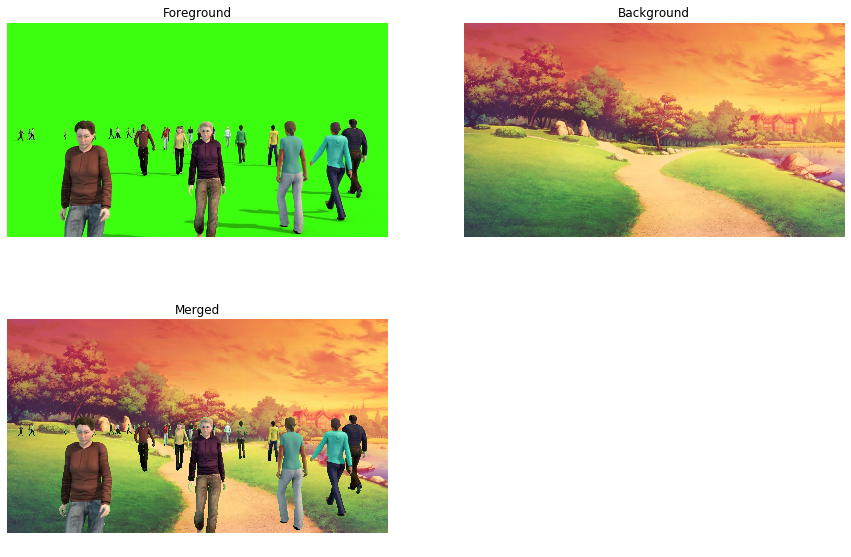

In [5]:
fg_image2 = cv2.imread("../images/people_walking.jpg")
fg_image2 = cv2.cvtColor(fg_image2, cv2.COLOR_BGR2RGB)
bg_image3 = cv2.imread("../images/park.jpg")
bg_image3 = cv2.cvtColor(bg_image3, cv2.COLOR_BGR2RGB)
bg_image3 = cv2.resize(bg_image3, (fg_image2.shape[1], fg_image2.shape[0]))

# removed the shadows because they are greenish in color and didn't look good in the final pic
merged_img3 = removeGreenScreenAndMerge(bg_image3, fg_image2, np.array([0, 110, 0]), np.array([110, 255, 90]))
                                        
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
axes1[0][0].imshow(fg_image2)
axes1[0][0].axis('off')
axes1[0][0].set_title("Foreground")

axes1[0][1].imshow(bg_image3)
axes1[0][1].axis('off')
axes1[0][1].set_title("Background")

axes1[1][0].imshow(merged_img3)
axes1[1][0].axis('off')
axes1[1][0].set_title("Merged")

axes1[1][1].axis('off')

plt.show()

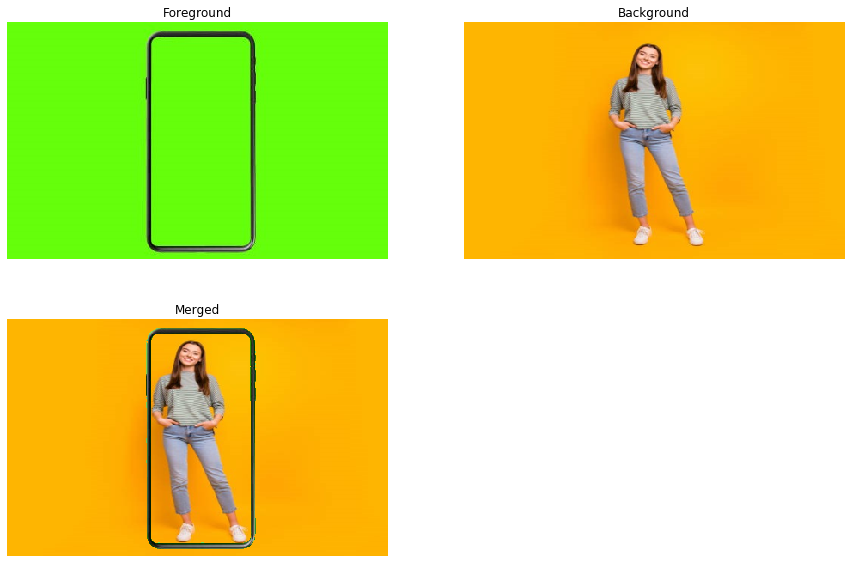

In [6]:
fg_image3 = cv2.imread("../images/mobile.jpg")
fg_image3 = cv2.cvtColor(fg_image3, cv2.COLOR_BGR2RGB)
bg_image4 = cv2.imread("../images/girl.jpg")
bg_image4 = cv2.cvtColor(bg_image4, cv2.COLOR_BGR2RGB)
bg_image4 = cv2.resize(bg_image4, (fg_image3.shape[1], fg_image3.shape[0]))

merged_img4 = removeGreenScreenAndMerge(bg_image4, fg_image3, np.array([50, 150, 0]), np.array([150, 255, 80]))
                                        
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
axes1[0][0].imshow(fg_image3)
axes1[0][0].axis('off')
axes1[0][0].set_title("Foreground")

axes1[0][1].imshow(bg_image4)
axes1[0][1].axis('off')
axes1[0][1].set_title("Background")

axes1[1][0].imshow(merged_img4)
axes1[1][0].axis('off')
axes1[1][0].set_title("Merged")

axes1[1][1].axis('off')

plt.show()

__2) Moody also wants to know how many images of size 720 x 576 can be stored
if cloud of size 2 GB is available. Assuming images are stored for displaying on
standard displays, calculate the number of images you can store in the cloud.__

__Ans:__
<br> Assuming standard displays, with no alpha channels 
<br> $\Longrightarrow$ 3 channels of 8 bits are used to represent color intensity of each pixel 
<br> $\Longrightarrow$ 24 bits per pixel
<br>
<br> 1 image has a size of 720 $\times$ 576 
<br> $\Longrightarrow$ 720 $\times$ 576 $\times$ 24 bits required per image 
<br> $\Longrightarrow$ 99,53,280 bits per image
<br>
<br> Moody has 2 GB storage available on the cloud
<br> $\Longrightarrow$ 2 $\times$ 1024<sup>3</sup> $\times$ 8 bits available
<br>
<br> Number of images that can be uploaded = Storage available / Image size
<br>                                       = (2 $\times$ 1024<sup>3</sup> $\times$ 8) / 99,53,280
<br>                                       = 1726.0510288
<br>                                       ~ 1726
<br>
<br> The 1727<sup>th</sup> image won't be stored successfully as the storage will become full
<br> Therefore, the total number of images of size 720 $\times$ 576 that Moody can store __successfully__ in 2 GB of cloud, assuming standard displays, is __1726__

---

## 2. Colin’s Storage Issues

__Ans:__
<br>Available storage = 500 MB
<br>Number of photo required = 200
<br>Image shapes are square, let the side of the square be a
<br>Assuming that the camera uses normal RGB channels of 8 bits $\Longrightarrow$ 24 bits per pixel
<br>Therefore, size of 1 image = a $\times$ a $\times$ 24 bits = 24 $\times$ a<sup>2</sup>
<br>200 such images required in 500 MB 
<br> $\Longrightarrow$ 200 $\times$ 24 $\times$ a<sup>2</sup> <= 500 $\times$ 1024<sup>2</sup> $\times$ 8
<br> $\Longrightarrow$ a<sup>2</sup> <= (500 $\times$ 1024<sup>2</sup> $\times$ 8) / ( 200 $\times$ 24 )
<br> $\Longrightarrow$ a<sup>2</sup> <= 873813.33333
<br> $\Longrightarrow$ a <= 934.77983147
<br>
<br>Since a is the side of a square image $\Longrightarrow$ a is an integer
<br> Therfore, max value of x possible = 934 pixels
<br>
<br> Therefore, max dimensions of an image such that Colin can take 200 images in 500 MB are __934 $\times$ 934__ (or __934 $\times$ 934 $\times$ 3__)

---

## 3. Identifying the Basilisk

__Ans:__ 
<br>Square CCD sensor of dimensions 10 x 10 mm with 1024 x 1024 pixels
<br>Focal length of camera lens = 43.5 cm = 0.435 m
<br>Let distance of image on sensor from lens be v (behind the lens), and distance of Basilisk be u (in front of lens)
<br>Safe distance >= 240 m $\Longrightarrow$ u >= 240 m
<br>Considering boundary case, u = 240 m
<br>
<br>Height in the captured image required is atleast 390 pixels
<br>Let height of image be hi, and height if Basilisk be h
<br>
<br>Now hi >= 390 pixels 
<br> $\Longrightarrow$ hi >= $\frac{390}{1024}$ $\times$ 10 mm
<br> $\Longrightarrow$ hi >= 3.81 mm
<br> $\Longrightarrow$ hi >= 0.00381 m and hi <= 0.01 m (due to sensor size)
<br> Taking boundary case, hi = 0.00381 m
<br>
<br>As we know,
<br>magnification = $\frac{hi}{h}$ = $\frac{v}{u}$
<br> $\Longrightarrow$ $\frac{0.00381}{h}$ = $\frac{v}{240}$
<br> $\Longrightarrow$ v = 0.9144 / h
<br>
<br>Lens equation -> $\frac{1}{f}$ = $\frac{1}{v}$ + $\frac{1}{u}$
<br> $\Longrightarrow$ $\frac{h}{0.9144}$ + $\frac{1}{240}$ = $\frac{1}{0.435}$
<br>
<br> $\Longrightarrow$ h = $\frac{(240-0.435)\times0.9144}{240\times0.435}$
<br> $\Longrightarrow$ h = 2.099 m ~ 2.1 m
<br>
<br>Therefore, the height of Basilisk is approximately __2.1 m__

---

## 4. Draco Strikes Again!

__1) Write a function bitQuantizeImage which takes an 8-bit image im and k, the
number of bits to which the image needs to be quantized to and returns the k-bit
quantized image.__

In [7]:
def bitQuantizeImage(im, k):
    assert k <= 8
    dividend = np.power(2, 8-k)
    out_img = im // dividend
    return out_img

The above function simply quantizes the input image by taking the quotient of 2<sup>8-k</sup> dividing pixel intensity. This is equivalent to the step quantization function.

__2) Colin wants see how good you are, so prove yourself by running the above function
on filch.jpg and find all 8-bits quantization results.__

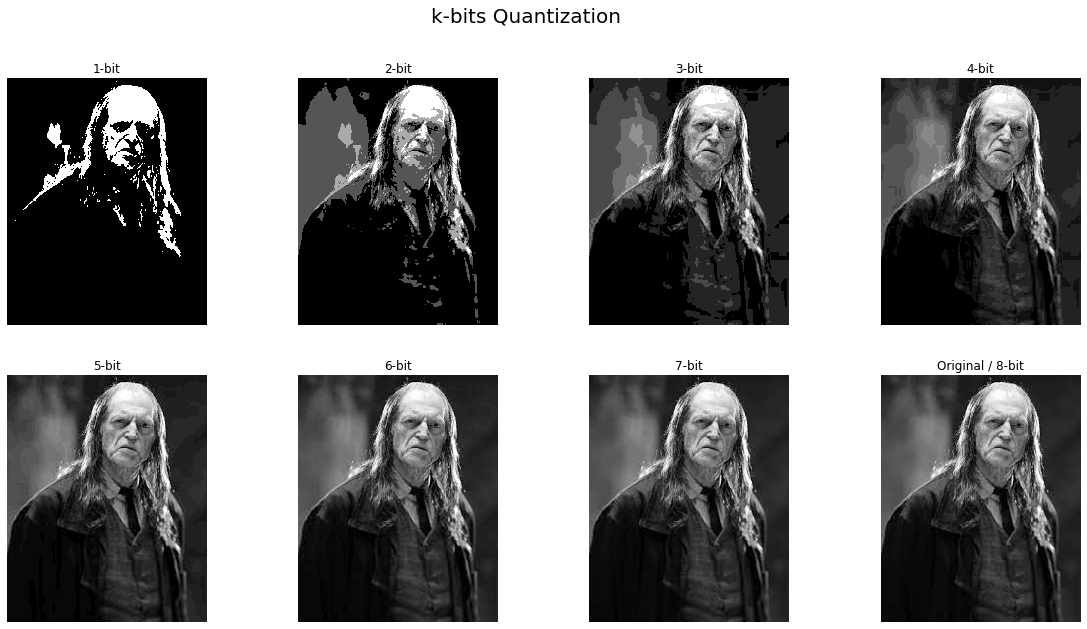

In [8]:
filch_img = cv2.imread("../images/filch.jpg")
filch_img = cv2.cvtColor(filch_img, cv2.COLOR_BGR2GRAY)

fig1, axes1 = plt.subplots(nrows = 2, ncols = 4, figsize=(20,10))
fig1.suptitle("k-bits Quantization", fontsize = 20)

for k in range(8):
    r = k // 4
    c = k % 4
    axes1[r][c].imshow(bitQuantizeImage(filch_img, k+1), cmap = 'gray')
    axes1[r][c].axis('off')
    title = str(k+1) + "-bit"
    axes1[r][c].set_title(title)
axes1[1][3].set_title("Original / 8-bit")
plt.show()

__3) Furthermore he wants you to show all the bit planes of hermoine.jpg.__

In [9]:
def get_bit_planes(img):
    binary_repr = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            binary_repr.append(np.binary_repr(img[i][j], width = 8))
            
    bit_planes = []
    
    for k in range(8):
        bit_planes.append(np.array([int(i[k]) for i in binary_repr], dtype = np.uint8) * np.power(2,k))
        bit_planes[k] = bit_planes[k].reshape(img.shape[0], img.shape[1])
    
    bit_planes.reverse()
    return bit_planes

The above function first converts the image into a flat array, then converts each intensity to its binary representation, collects the bit-plane values into 8 arrays, and then reshapes these 8 arrays back to image dimensions.

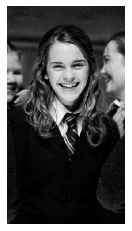

In [10]:
hermoine_img = cv2.cvtColor(cv2.imread("../images/hermoine.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(hermoine_img, cmap = 'gray')
plt.axis('off')
plt.show()

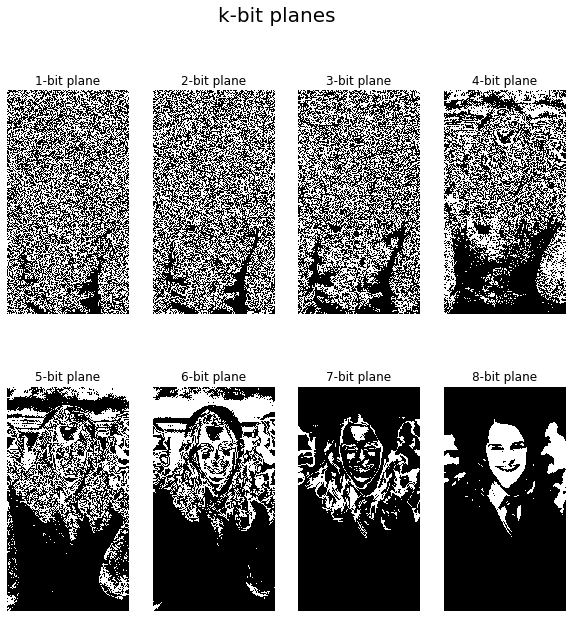

In [11]:
original_img = cv2.cvtColor(cv2.imread("../images/dobby.jpg"), cv2.COLOR_BGR2GRAY)
bit_planes = get_bit_planes(hermoine_img)

fig1, axes1 = plt.subplots(nrows = 2, ncols = 4, figsize=(10,10))
fig1.suptitle("k-bit planes", fontsize = 20)

for k in range(8):
    r = k // 4
    c = k % 4
    axes1[r][c].imshow(bit_planes[k], cmap = 'gray')
    axes1[r][c].axis('off')
    title = str(k+1) + "-bit plane"
    axes1[r][c].set_title(title)

__4) Now that you have gained the trust of Colin Help him guess the corruption procedure for a target person’s image, person corrupt.jpg The correct images that you know for that corresponding person from Colin’s memory represented by person.jpg__

k = My roll no. % 5 = 2021701002 % 5 = 2
$\Longrightarrow$ person == dobby

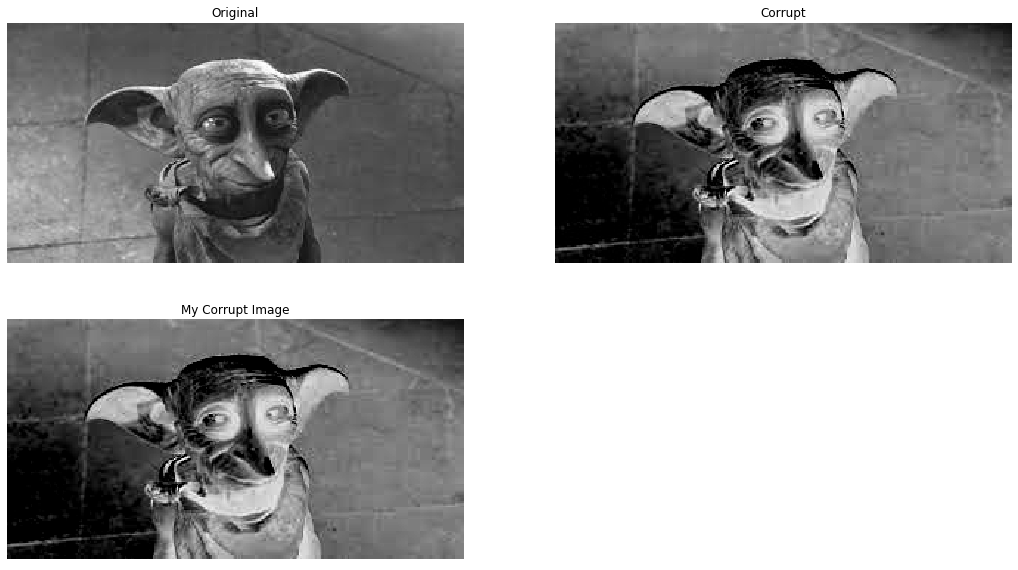

In [12]:
corrupt_img = cv2.cvtColor(cv2.imread("../images/dobby_corrupt.jpg"), cv2.COLOR_BGR2GRAY)
original_img = cv2.cvtColor(cv2.imread("../images/dobby.jpg"), cv2.COLOR_BGR2GRAY)
# print(original_img)
my_corrupt_img = np.copy(original_img)
my_corrupt_img[my_corrupt_img > 155] = 155
my_corrupt_img = 155 - my_corrupt_img
# print(original_img, "\n\n", corrupt_img)

# bits_planes = get_bit_planes(original_img)
# new_image = np.zeros(original_img.shape)
# new_image = 128 * bits_planes[7] + 16 * bits_planes[4] + 8 * bits_planes[3] + 2 * bits_planes[1] + bit_planes[0]

fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, figsize=(18,10))

axes1[0][0].imshow(original_img, cmap = 'gray')
axes1[0][0].axis('off')
axes1[0][0].set_title("Original")

axes1[0][1].imshow(corrupt_img, cmap = 'gray')
axes1[0][1].axis('off')
axes1[0][1].set_title("Corrupt")

axes1[1][0].imshow(my_corrupt_img, cmap = 'gray')
axes1[1][0].axis('off')
axes1[1][0].set_title("My Corrupt Image")

axes1[1][1].axis('off')

plt.show()

In [13]:
# plt.imshow(corrupt_img - my_corrupt_img, cmap = 'gray')
# print(my_corrupt_img - corrupt_img)

After trying out a lot of combinations, I found out that the above process (155 - original image in grayscale with values grater than 155 made zero) gets me very close to the corrupted image, probably the difference is some noise.

---

## 5. Snape and The Order of The Phoenix

__1) Write a function linContrastStretching which takes any image im, integers a
and b that enhance the contrast such that the resulting intensity range is [a, b].__

In [14]:
def linContrastStretchingSingleChannel(img, a, b):
    low_intensity = img.min()
    high_intensity = img.max()
    constant_factor = (b-a) / (high_intensity - low_intensity)
    return (a + (img - low_intensity) * constant_factor)

def linContrastStretching(im, a, b):
    if len(im.shape) == 2:
        return (linContrastStretchingSingleChannel(im, a, b)).astype(int)
    
    out_im = np.zeros(im.shape, np.uint8)
    for channel in range(im.shape[2]):
        out_im[:,:,channel] = linContrastStretchingSingleChannel(im[:,:,channel], a, b)
    return out_im

__2) Use the function to improve the intensity of phoenix-bad.jpg and supposedly
assist Voldemort.__

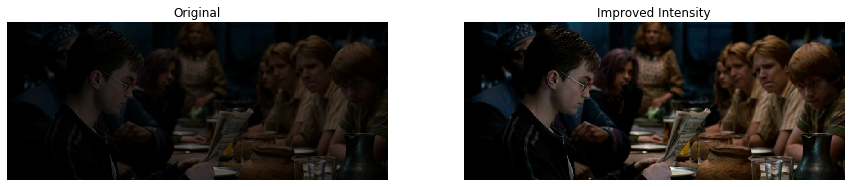

In [15]:
original_image = cv2.imread("../images/phoenix-bad.jpg")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

fig1, axes1 = plt.subplots(1,2, figsize = (15,10))
axes1[0].imshow(original_image)
axes1[0].axis('off')
axes1[0].set_title("Original")

enhanced_image = linContrastStretching(original_image, 0, 255)
axes1[1].imshow(enhanced_image)
axes1[1].axis('off')
axes1[1].set_title("Improved Intensity")

plt.show()

linContrastStretching maps the lowest intensity of each channels to a and highest intensity of each channels to b and the linearly stretches each intensity value in the channels according. Now, when we stretch intensities of the image channels to a larger range, we basically get a broader combination of the channels or broader range of colours to represent the image, which results in an improved contrast. By using a = 0 and b = 255, we have increased the overall number of rgb combinations allowed to express colour in the image to the maximum possible in a 3 bit 8 channel system, hence increasing the contrast.

__3) Show the input image and the resultant image along with their colorbars (a strip
containing k most frequently occurring colors). Give suitable explanation for the
resulting colorbars.__

In [16]:
def get_colorbar(img, k):
    colors, frequency = np.unique(img.reshape(-1, 3), axis = 0, return_counts = True)
    color_freq_list = zip(colors, frequency)
    sorted_color_freq_list = sorted(color_freq_list, key = lambda x: x[1], reverse = True)
#     print(sorted_color_freq_list[0:k])
    sorted_colors = [color for _, color in sorted_color_freq_list]
#     print(sorted_colors[0:k])
    width = 50 * k
    
    colorbar = np.zeros((50, width, 3), np.uint8)
    
    for i in range(k): 
        start_width = 50 * i
#         print(sorted_colors[i])
        colorbar[:, start_width : start_width + 49, :] = sorted_colors[i]
    return colorbar

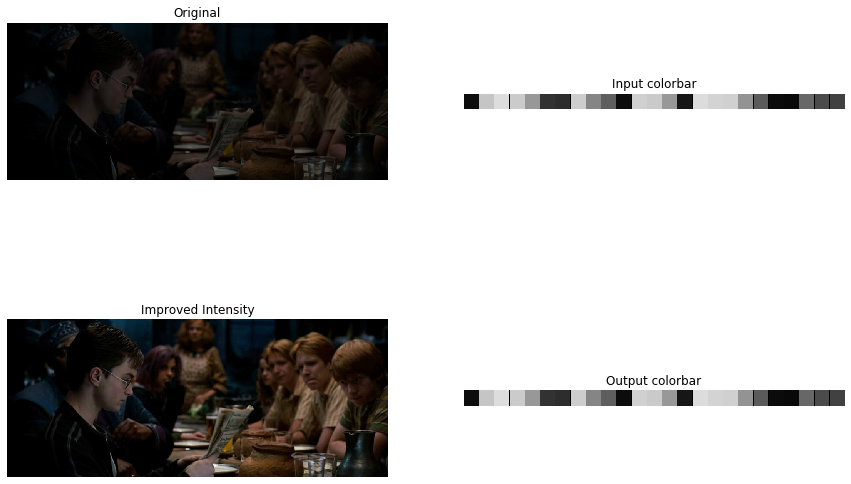

In [17]:
fig1, axes1 = plt.subplots(2,2, figsize = (15,10))
axes1[0][0].imshow(original_image)
axes1[0][0].axis('off')
axes1[0][0].set_title("Original")

enhanced_image = linContrastStretching(original_image, 0, 255)
axes1[1][0].imshow(enhanced_image)
axes1[1][0].axis('off')
axes1[1][0].set_title("Improved Intensity")
 
axes1[0][1].imshow(get_colorbar(original_image, 25))
axes1[0][1].axis('off')
axes1[0][1].set_title("Input colorbar")

axes1[1][1].imshow(get_colorbar(enhanced_image, 25))
axes1[1][1].axis('off')
axes1[1][1].set_title("Output colorbar")

plt.show()

The getcolorbar function takes an image and outputs a strip of k frequently used colors and not color clusters. Now, since this function works on frequency only, therefore we are getting similar colorbars for both the images and we might notice some difference when the value of k is sufficiently large due to the contrast stretching, as these are commonly occuring colours in both the images. As I read online, we can instead try using k-means cluster to find out the clusters of dominant color instead of plotting each variation of the color, and that might give us a good idea about the changes made by the linear contrast stretching.

In [18]:
# print(get_colorbar(enhanced_image, 100) == get_colorbar(original_image, 100))

---

## 6. Hermoine and linear transforms

__1) Write a function piecewiseLinTransform to implement a piecewise linear transform
<br>g(z) = K<sup>i</sup><sub>1</sub>· z + K<sup>i</sup><sub>2</sub>;   a<sub>i</sub> ≤ z ≤ b<sub>i</sub>
<br>The function takes an input grayscale image, coefficients K1,K2 and intervals [a, b]
for each linear segment and produces the transformed output image.__

In [19]:
def piecewiseLinTransform(gray_img, coefficients, intervals, copy = False):
    gray_img_copy = gray_img / 255
    if copy:
        out_img = np.copy(gray_img)
    else:
        out_img = np.zeros(gray_img.shape, np.uint8)
        
    for k in range(len(intervals)):
        condition = np.where((gray_img_copy >= intervals[k][0]) & (gray_img_copy <= intervals[k][1]))
        out_img[condition] = (coefficients[k][0] * gray_img_copy[condition] + coefficients[k][1]) * 255

    return out_img

piecewiseLinTransform takes an input image and the coefficients(k1,k2) of lines and the intervals([a, b]) in which these linear transformations are to be applied. Since linear transformations are applied by normalizing the images to the range [0,1], we have made a copy of input image by dividing it by 255. We then initialize a new image to 0. We now iterate through the intervals and check for all values of input image which lie in these intervals using numpy. We then take the values and apply te linear transformation using the coefficients for the specific interval and multiply it back by 255. After all the intervals have been completed, we return the output image.
I have also added a boolean named copy, which lets us manipulate only a smaller section of the image by keeping the rest of the image same. When copy is false, the values not covered by any of the intervals is set to 0.

For the below 3 illustrations, we have just calculated the line equations of each linear transformation present in the graphs for the respective images, and taken a note of their intervals, and passed them to the function piecewiseLinTransform.

__2) Run the images through piecewiseLinTransform on snape1.jpg and hagrid.jpg.
The piecewise linear functions to be used are given for each image.__

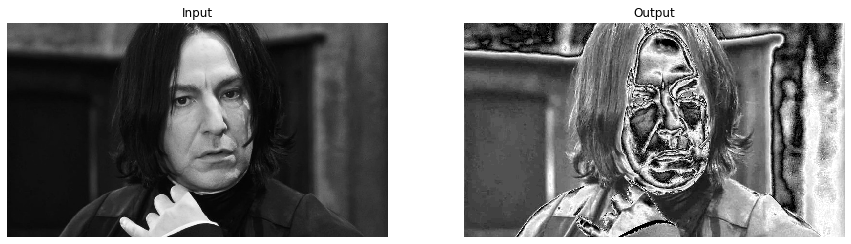

In [20]:
snape_img = cv2.imread("../images/snape1.jpg")
snape_img = cv2.cvtColor(snape_img, cv2.COLOR_BGR2GRAY)

intervals = [[0,0.2], [0.2,0.3], [0.3,0.5], [0.5,0.6], [0.6,0.8], [0.8,0.9]]
coefficients = [[1,0], [-2,0.6], [1,-0.3], [-2,1.2], [1,-0.6], [-2,1.8]]
snape_out_img = piecewiseLinTransform(snape_img, coefficients, intervals)

fig1, axes1 = plt.subplots(1, 2, figsize = (15,5))

axes1[0].imshow(snape_img, cmap = 'gray')
axes1[0].set_title("Input")
axes1[0].axis('off')

axes1[1].imshow(snape_out_img, cmap = 'gray')
axes1[1].axis('off')
axes1[1].set_title("Output")

plt.show()

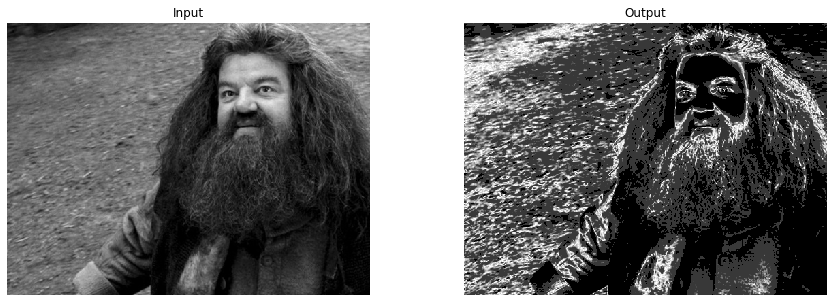

In [21]:
hagrid_img = cv2.imread("../images/hagrid.jpg")
hagrid_img = cv2.cvtColor(hagrid_img, cv2.COLOR_BGR2GRAY)

intervals = [[0,0.1], [0.1,0.2], [0.2,0.3], [0.3,0.4], [0.4,0.5], [0.5,1]]
coefficients = [[0,0], [0,0.2], [7,-1.2], [-7,3.0], [0,0.2], [0,0]]
hagrid_out_img = piecewiseLinTransform(hagrid_img, coefficients, intervals)

fig1, axes1 = plt.subplots(1, 2, figsize = (15,5))

axes1[0].imshow(hagrid_img, cmap = 'gray')
axes1[0].set_title("Input")
axes1[0].axis('off')

axes1[1].imshow(hagrid_out_img, cmap = 'gray')
axes1[1].axis('off')
axes1[1].set_title("Output")

plt.show()

__3) Take your photo, convert to grayscale, and run piecewiseLinTransform using any
custom piecewise linear function that you like. Plot the function used.__

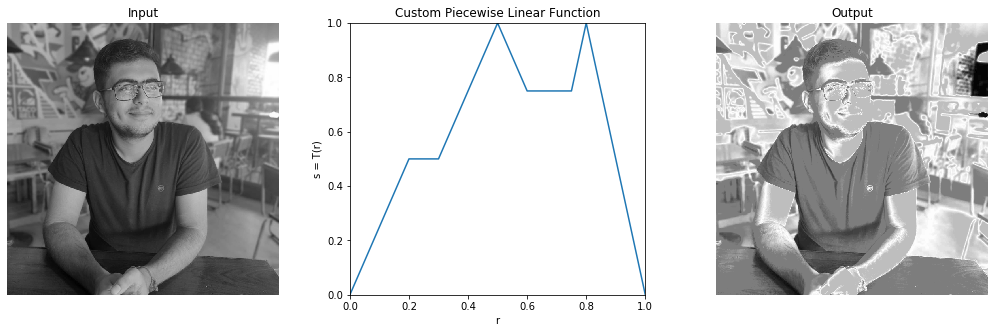

In [22]:
my_image = cv2.imread("../images/my_image.jpg")
my_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
intervals = [[0,0.2], [0.2,0.3], [0.3,0.5], [0.5,0.6], [0.6,0.75], [0.75,0.8], [0.8,1]]
coefficients = [[2.5,0], [0,0.5], [2.5,-0.25], [-2.5,2.25], [0,0.75], [5,-3], [-5,5]]
my_image_out = piecewiseLinTransform(my_image, coefficients, intervals)

fig1, axes1 = plt.subplots(1, 3, figsize = (18,5))

axes1[0].imshow(my_image, cmap = 'gray')
axes1[0].axis('off')
axes1[0].set_title("Input")

x = [0, 0.2, 0.3, 0.5, 0.6, 0.75, 0.8, 1]
y = [0, 0.5, 0.5, 1, 0.75, 0.75, 1, 0]
axes1[1].plot(x, y)
axes1[1].set_xlabel("r")
axes1[1].set_ylabel("s = T(r)")
axes1[1].set_title("Custom Piecewise Linear Function")
axes1[1].set_xlim([0,1])
axes1[1].set_ylim([0,1])

axes1[2].imshow(my_image_out, cmap = 'gray')
axes1[2].axis('off')
axes1[2].set_title("Output")

plt.show()

---

## 7. The Marauder’s Map

__• Write a function histEqualization which takes a grayscale image img, and applies
histogram equalization on the entire image.__

In [23]:
def get_new_intensities(img):
    new_intensities = np.zeros(256)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_intensities[img[i][j]] += 1
    
    for i in range(1,256):
        new_intensities[i] = new_intensities[i] + new_intensities[i-1]
        
    pixel_count =  (img.shape[0] * img.shape[1])
    return (np.round(255 * new_intensities / pixel_count, 0)).astype(int)   # round(255 * pdf)

def histEqualization(img):
    out_img = img.copy()
    new_intensities = get_new_intensities(img)
    return new_intensities[img]

__• Apply the function on fred.jpeg and display the input image and the resultant
image. Plot the histograms for input and resultant image and explain the changes
you observe for each image.__

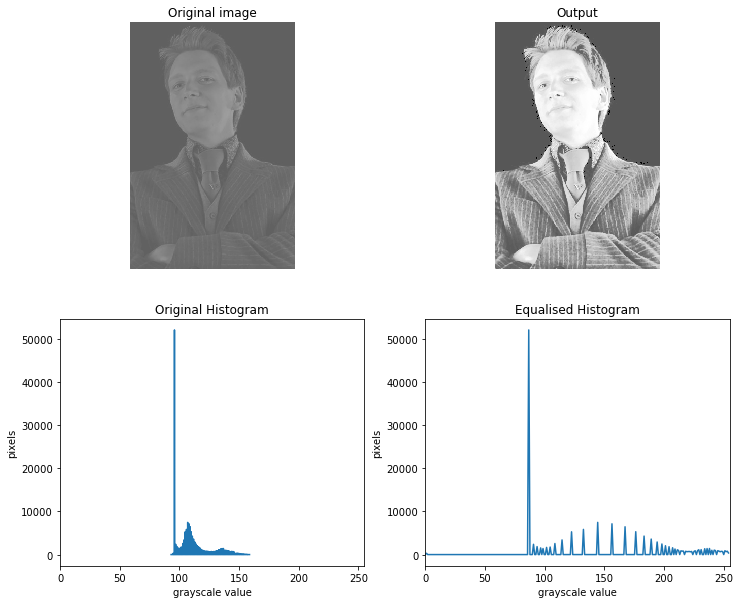

In [24]:
fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))

fred_img = cv2.imread("../images/fred.jpeg")
fred_img = cv2.cvtColor(fred_img, cv2.COLOR_BGR2GRAY)
axes1[0][0].imshow(fred_img, cmap = 'gray',  vmin = 0, vmax = 255)
axes1[0][0].axis('off')
axes1[0][0].set_title("Original image")

histogram, bin_edges = np.histogram(fred_img, bins=256)
axes1[1][0].plot(bin_edges[0:-1], histogram)
axes1[1][0].set_xlabel("grayscale value")
axes1[1][0].set_ylabel("pixels")
axes1[1][0].set_title("Original Histogram")
axes1[1][0].set_xlim([0,255])

fred_img_histEqual = histEqualization(fred_img)
axes1[0][1].imshow(fred_img_histEqual, cmap = 'gray', vmin = 0, vmax = 255)
axes1[0][1].set_title("Output")
axes1[0][1].axis('off')

histogram, bin_edges = np.histogram(fred_img_histEqual, bins=256)
axes1[1][1].plot(bin_edges[0:-1], histogram)
axes1[1][1].set_xlabel("grayscale value")
axes1[1][1].set_ylabel("pixels")
axes1[1][1].set_title("Equalised Histogram")
axes1[1][1].set_xlim([0,255])

plt.show()

histEqualization takes in an input image and tries to improve the contrast of the image by spreading the input histogram uniformly over the range [0,255]. We do this using CDF of the intensities. This should work theorotically but due to discrete nature of the image, doesn't spread the input uniformly, this can be seen on the histogram of the output image above. Still, histogram equalization manages to improve the contrast of a input image as can be seen above, as it manages to spread the frequencies of the input image over a larger range and hence create a distinguishable difference between pixel intensities.

__• Write a function histMatching which takes an input image and a reference image
and applies histogram matching on the input image by matching the histogram
with that of the reference image.__

In [25]:
def binarySearch(key, arr, s, e):
    if s == e:
        return s
    m = (s + e) // 2
    if(arr[m] > key):
        return binarySearch(key, arr, s, m-1)
    elif(arr[m] < key):
        return binarySearch(key, arr, m+1, e)
    return m

def histMatching(input_img, reference):
    new_intensities_input = get_new_intensities(input_img)
    new_intensities_reference = get_new_intensities(reference)
#     print(new_intensities_input)
#     print(new_intensities_reference)
    reverse_intensities = np.zeros(256, np.uint8)
    
    for i in range(256):
        key = new_intensities_input[i]
        index = binarySearch(key, new_intensities_reference, 0, 255)
        
        if key == new_intensities_reference[index]:
            temp_index = index - 1
            while (temp_index >= 0 and new_intensities_reference[temp_index] == key):
                index = temp_index
                temp_index = index - 1
                
        reverse_intensities[i] = index
        
#     print(reverse_intensities)
    return reverse_intensities[input_img]

__• Try histogram matching on map.jpeg and map-reference.jpeg.__

In [26]:
map_img = cv2.cvtColor(cv2.imread("../images/map.jpeg"), cv2.COLOR_BGR2GRAY)
map_refernce_img = cv2.cvtColor(cv2.imread("../images/map-reference.jpeg"), cv2.COLOR_BGR2GRAY)
map_img_final = histMatching(map_img, map_refernce_img)

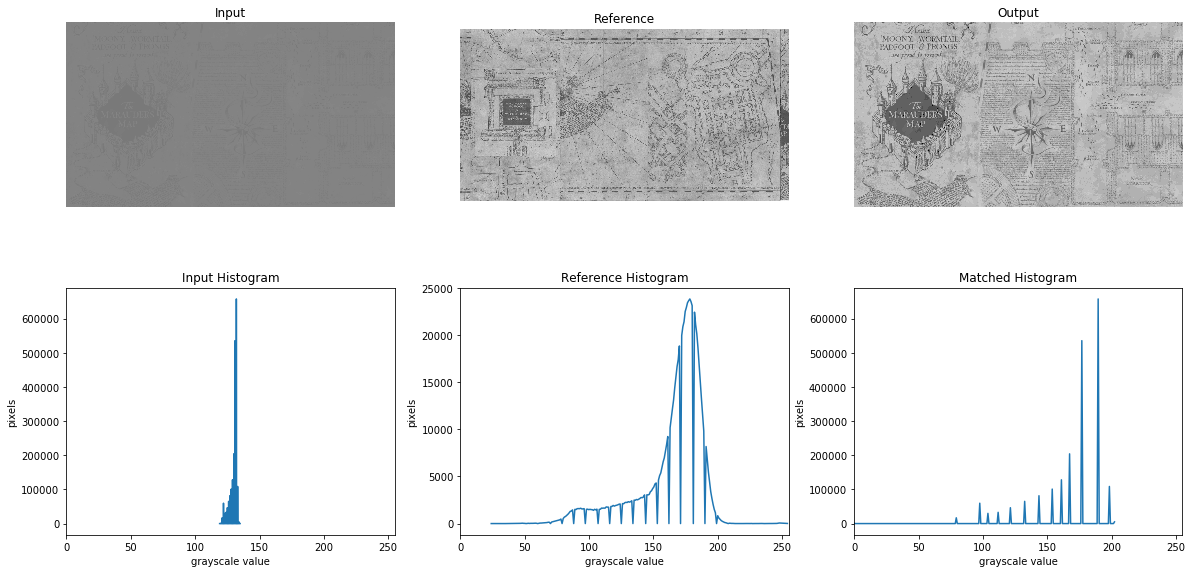

In [27]:
fig1, axes1 = plt.subplots(2,3, figsize = (20,10))

axes1[0][0].imshow(map_img, cmap='gray', vmin = 0, vmax = 255)
axes1[0][0].axis('off')
axes1[0][0].set_title("Input")

axes1[0][1].imshow(map_refernce_img, cmap='gray', vmin = 0, vmax = 255)
axes1[0][1].axis('off')
axes1[0][1].set_title("Reference")

axes1[0][2].imshow(map_img_final, cmap='gray', vmin = 0, vmax = 255)
axes1[0][2].axis('off')
axes1[0][2].set_title("Output")

histogram, bin_edges = np.histogram(map_img, bins=256)
axes1[1][0].plot(bin_edges[0:-1], histogram)
axes1[1][0].set_xlabel("grayscale value")
axes1[1][0].set_ylabel("pixels")
axes1[1][0].set_title("Input Histogram")
axes1[1][0].set_xlim([0,255])

histogram, bin_edges = np.histogram(map_refernce_img, bins=256)
axes1[1][1].plot(bin_edges[0:-1], histogram)
axes1[1][1].set_xlabel("grayscale value")
axes1[1][1].set_ylabel("pixels")
axes1[1][1].set_title("Reference Histogram")
axes1[1][1].set_xlim([0,255])

histogram, bin_edges = np.histogram(map_img_final, bins=256)
axes1[1][2].plot(bin_edges[0:-1], histogram)
axes1[1][2].set_xlabel("grayscale value")
axes1[1][2].set_ylabel("pixels")
axes1[1][2].set_title("Matched Histogram")
axes1[1][2].set_xlim([0,255])

plt.show()

---

## 8. The Seven Horcruxes

__• Write a function gammaTransform that implements s = r<sup>$\gamma$</sup> on a grayscale image and vary $\gamma$. Report your observations when $\gamma$ is less than 1 and when $\gamma$ is greater than 1.__

In [28]:
def gammaTransform(gray_img, gamma):
    return (np.power(gray_img/255, gamma) * 255).astype(int)

__• Apply gamma transformation on locket.jpeg to increase the brightness in the
image. Report your observations.__

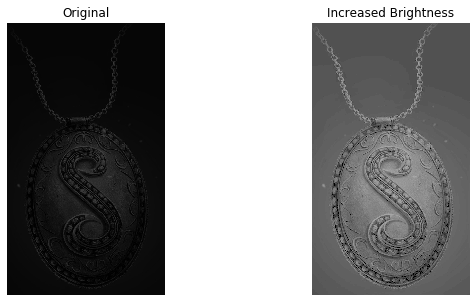

In [29]:
locket_img = cv2.imread("../images/locket.jpeg")
locket_img = cv2.cvtColor(locket_img, cv2.COLOR_BGR2GRAY)
locket_img_new = gammaTransform(locket_img, 0.3)

fig1, axes1 = plt.subplots(1,2, figsize = (10,5))
axes1[0].imshow(locket_img, cmap = "gray", vmin = 0, vmax = 255)
axes1[0].axis("off")
axes1[0].set_title("Original")
axes1[1].imshow(locket_img_new, cmap = "gray", vmin = 0, vmax = 255)
axes1[1].axis("off")
axes1[1].set_title("Increased Brightness")
plt.show()

Gamma < 1 increases the brightness of image and the lesser the gamma, the higher is the brightness. Although when the gamma value decreases a lot, we start losing contrast and also the details due to the disrete nature of images as the new intensities become too light and close to each other that they are indistinguishable, hence I found gamma = 0.3 to be good for the locket image.

__• Apply gamma transformation on voldemort.jpeg to decrease the brightness in the
image. Report your observations.__

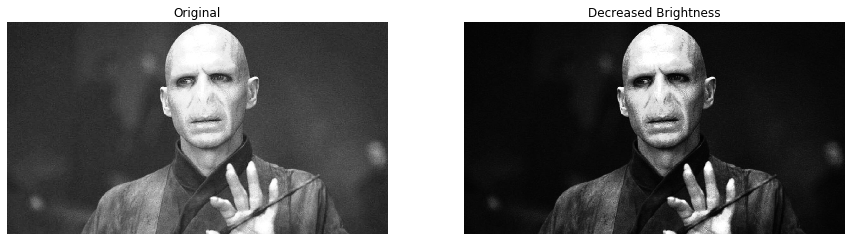

In [30]:
voldemort_img = cv2.imread("../images/voldemort.jpeg")
voldemort_img = cv2.cvtColor(voldemort_img, cv2.COLOR_BGR2GRAY)
voldemort_img_new = gammaTransform(voldemort_img, 2)

fig1, axes1 = plt.subplots(1,2, figsize = (15,10))
axes1[0].imshow(voldemort_img, cmap = "gray", vmin = 0, vmax = 255)
axes1[0].axis("off")
axes1[0].set_title("Original")
axes1[1].imshow(voldemort_img_new, cmap = "gray", vmin = 0, vmax = 255)
axes1[1].axis("off")
axes1[1].set_title("Decreased Brightness")
plt.show()

Similarly, Gamma > 1 decreases the brightness of image and the higher the gamma, the lower is the brightness. Although as the gamma value increases a lot, we start losing contrast and also the details due to the disrete nature of images, as the new intensities become too dark and close to each other that they are indistinguishable, hence I found gamma = 2 to be good for the voldemort image. We can notice that the people in the back of the 1st image have mixed in the background of the 2nd image

---

## 9. Is that the best you got?

__1) You are provided with 4 grayscale images (neville1.jpg, neville2.jpg, neville3.jpg,
neville4.jpg) with different contrast levels, which correspond to parts of the same
image.__

__2) Retrieve the original image using these four images as best you can. You can use a
combinations of techniques used in this assignment.__

__3) You will be evaluated on how uniform your final output looks. Clarity is not
important as details are not present in the images. Use any of the above methods
to achieve a common gray level as best you can.__

In [31]:
neville = []
for i in range(4):
    neville.append(cv2.cvtColor(cv2.imread(("../images/neville" + str(i+1) + ".jpg")), cv2.COLOR_BGR2GRAY))

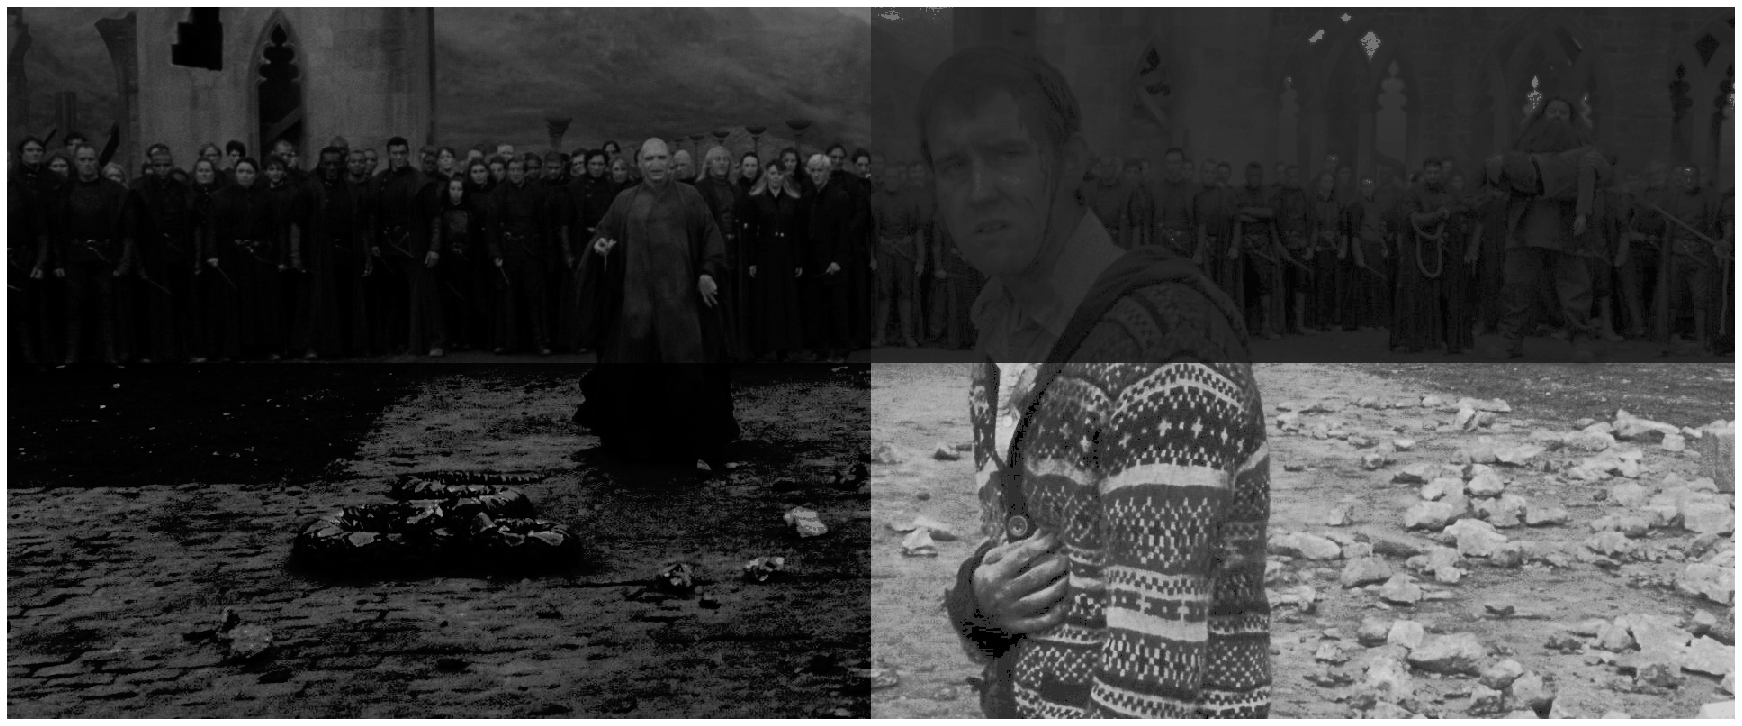

In [32]:
fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, figsize=(30,12.37))

for k in range(4):
    c = k // 2
    r = k % 2
    axes1[r][c].imshow(neville[k], cmap = 'gray', vmin = 0, vmax = 255)
    axes1[r][c].axis('off')
# plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace= 0, 
                    hspace= 0)
plt.show()

In [33]:
neville_new = neville.copy()
neville_new[0] = linContrastStretching(neville[0], 0, 255)
neville_new[1] = linContrastStretching(gammaTransform(histEqualization(linContrastStretching(histEqualization(neville[1]), 0, 140)), 0.6), 0, 140)
neville_new[2] = histMatching(neville[2], neville_new[0])

neville_new[0] = piecewiseLinTransform(neville_new[0], [[1,-0.1], [1, -0.2]], [[0.7, 0.9], [0.9, 1]], True)

neville_new[2] = gammaTransform(histMatching(neville[2], neville_new[0]), 0.8)
# neville_new[2][neville_new[2] > 150] = neville_new[2][neville_new[2] > 150] + 2
neville_new[2] = piecewiseLinTransform(neville_new[2], [[1,-0.25]], [[0.8, 1]], True)

neville_new[3] = gammaTransform(linContrastStretching(neville[3],0,255), 2.7)
neville_new[3] = piecewiseLinTransform(neville_new[3], [[1, 0.05],[1,-0.125], [0, 0.5]], [[0, 0.62],[0.62, 0.78], [0.78,1]], True)
# neville_new[3][neville_new[3] > 160] = neville_new[3][neville_new[3] > 160] - 30

neville_new[2] = gammaTransform(neville_new[2], 1.135)

neville_new[1] = piecewiseLinTransform(neville_new[1], [[1, 0.06]], [[100/255, 200/255]], True)

neville_new[2] = gammaTransform(piecewiseLinTransform(neville_new[2], [[1,0.035]], [[0.5, 0.7]], True), 1.05)

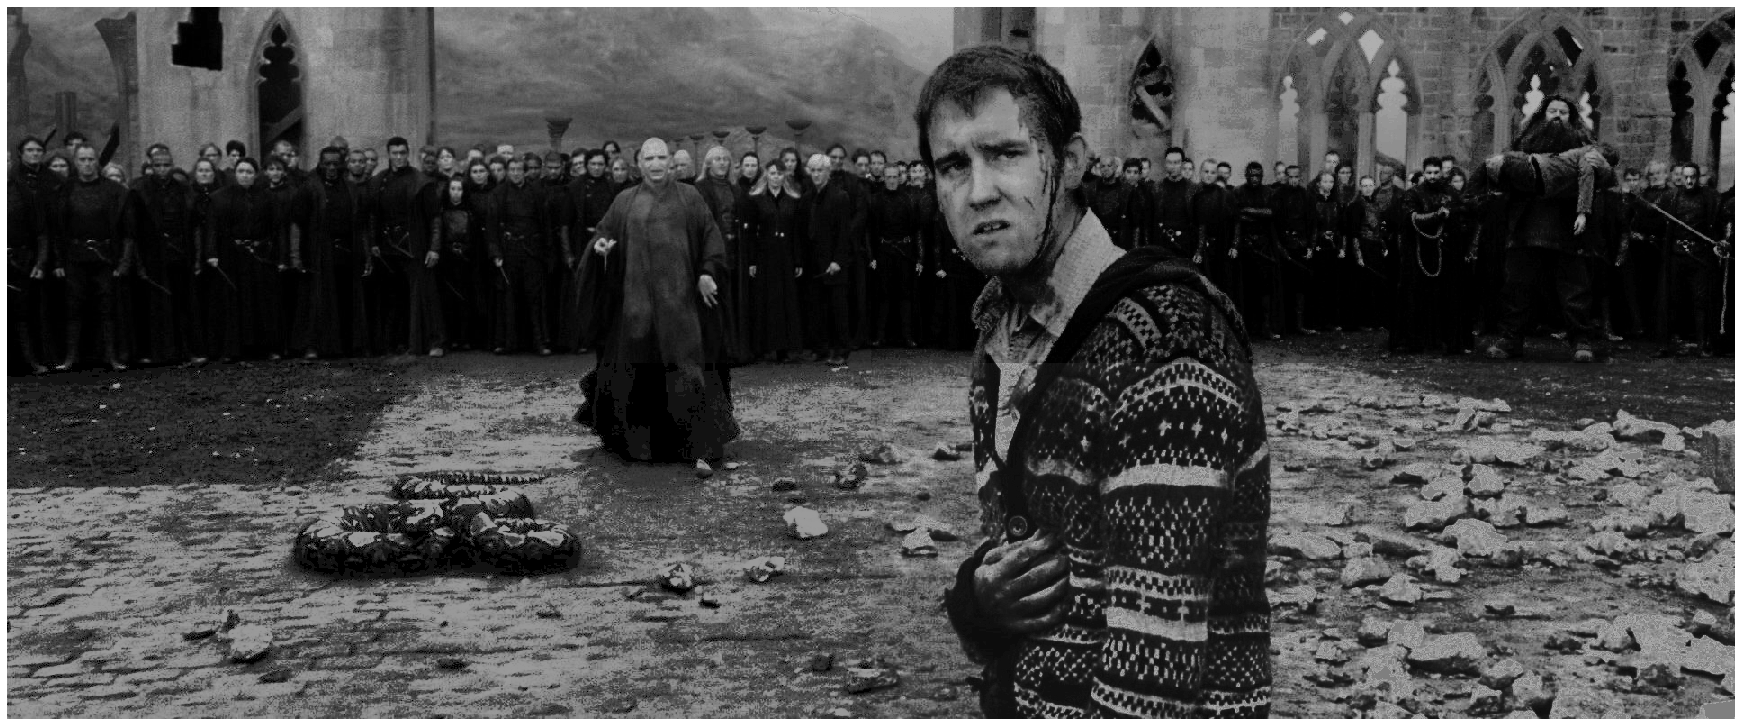

In [34]:
fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, figsize=(30,12.37))

for k in range(4):
    c = k // 2
    r = k % 2
    axes1[r][c].imshow(neville_new[k], cmap = 'gray',vmin = 0, vmax = 255)
    axes1[r][c].axis('off')
# plt.subplot_tool()
plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0, 
                    hspace = 0)
plt.show()

After a lot of trials and errors, this is the final image. We can probably still improve this but now my eyes can't make out the difference.

---

In [35]:
# fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, figsize=(30,12.37))
# for k in range(4):
#     c = k // 2
#     r = k % 2
#     histogram, bin_edges = np.histogram(neville[k], bins=256)
#     axes1[r][c].plot(bin_edges[0:-1], histogram)
# # plt.subplot_tool()
# # plt.subplots_adjust(left=0.1,
# #                     bottom=0.1, 
# #                     right=0.9, 
# #                     top=0.9, 
# #                     wspace= 0, 
# #                     hspace= 0)
# plt.show()

In [36]:
# This one matches 3 images
# neville_new = neville.copy()
# neville_new[0] = gammaTransform(histEqualization(linContrastStretching(neville[0], 0, 255)), 1.1)
# neville_new[2] = histEqualization(neville[2])
# neville_new[3] = linContrastStretching(neville[3], 0, 255)

In [37]:
# This one matches both the left ones only
# neville_new[0] = linContrastStretching(neville[0], 12, 255)
# neville_new[1] = histEqualization(neville[1])

In [38]:
# This one matches both the right ones only
# neville_new[2] = histEqualization(neville[2])
# neville_new[3] = linContrastStretching(neville[3], 0, 255)

In [39]:
# gamma = 3
# neville_new[3] = gammaTransform(neville[3], gamma)
# plt.imshow(neville_new[3], cmap = 'gray')
# neville_new[2] = gammaTransform(neville_new[2], gamma)
# plt.imshow(neville_new[2], cmap = 'gray')

In [40]:
# neville_new[1] = histMatching(neville[1], neville_new[0])
# # neville_new[1] = gammaTransform(neville_new[1], 0.6)

In [41]:
# neville_new[1] = linContrastStretching(neville_new[1], 0, 255)
# neville_new[1] = histEqualization(gammaTransform(neville_new[1], 0.27))

In [42]:
# print(neville_new[0][len(neville_new[0])- 1])

In [43]:
# print(neville_new[1][0])

In [44]:
# neville_new = neville.copy()
# neville_new[2][neville[2] > 80] = 80
# neville_new[3][neville[3] < 40] = 50
# neville_new[1] = histEqualization(neville_new[1])
# neville_new[0] = gammaTransform(histEqualization(linContrastStretching(neville[0], 0, 255)), 1.1)
# neville_new[2] = linContrastStretching(histEqualization(neville_new[2]),0,255)
# neville_new[3] = histEqualization(neville_new[3])
# neville_new[3] = histMatching(neville_new[3], neville_new[2])

In [45]:
# neville_new = neville.copy()

# neville_new[0] = gammaTransform(histEqualization(linContrastStretching(neville[0], 0, 255)), 1.1)
# neville_new[2] = histEqualization(neville[2])
# neville_new[3] = linContrastStretching(neville[3], 0, 255)
# neville_new[1] = histEqualization(gammaTransform(histEqualization(linContrastStretching(histMatching(neville_new[1], neville[3]), 0, 255)), 0.6))

In [46]:
# print(neville_new[2])
# plt.imshow(neville_new[2], cmap = 'gray')

In [47]:
# neville_new = neville.copy()
# neville_new[0] = gammaTransform(histEqualization(linContrastStretching(neville[0], 0, 255)), 1.1)
# neville_new[2] = histEqualization(neville[2])
# neville_new[3] = linContrastStretching(neville[3], 0, 255)
# neville_new[1] = linContrastStretching(gammaTransform(histEqualization(linContrastStretching(histEqualization(neville[1]), 0, 140)), 0.6), 0, 140)

In [48]:
# print(neville_new[2][0])

In [49]:
# fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, figsize=(30,12.37))
# for k in range(4):
#     c = k // 2
#     r = k % 2
#     histogram, bin_edges = np.histogram(neville_new[k], bins=256)
#     axes1[r][c].plot(bin_edges[0:-1], histogram)
# # plt.subplot_tool()
# # plt.subplots_adjust(left=0.1,
# #                     bottom=0.1, 
# #                     right=0.9, 
# #                     top=0.9, 
# #                     wspace= 0, 
# #                     hspace= 0)
# plt.show()

In [50]:
# plt.plot(neville_new[0][:][neville_new[0].shape[0]-1], neville_new[2][:][0])
# print(neville_new[0][:][neville_new[0].shape[0]-1], "\n", neville_new[2][:][0])

In [51]:
# print(neville_new[1][0][0])
# print(neville_new[0][0][len(neville_new[0][0])-1])

---